In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from PIL import Image

In [2]:
# For interactive plots (optional)
import plotly.express as px

# Display all columns
pd.set_option('display.max_columns', None)

In [3]:
# Define file path
DATA_PATH = "../data/raw/DataScience_jobs.csv"

try:
    df = pd.read_csv(DATA_PATH, index_col=0)
    print("Data loaded successfully.")
except FileNotFoundError:
    print("ERROR: File not found.")

# Preview
df.head()

Data loaded successfully.


,roles,companies,locations,experience,skills
0,Data Scientist,Ltimindtree,"Hybrid - Hyderabad, Chennai, Bengaluru",8-13 Yrs,"Data Science, Gen ai, Python, Data, Science, G..."
1,Urgent Hiring For FullStack-Data Scientist-Imm...,Genpact,"Hybrid - Gurugram, Bengaluru",7-12 Yrs,"Natural Language Processing, Machine Learning ..."
2,Sr. Data Scientist,NaN,NaN,NaN,NaN
3,Artificial Intelligence Developer,NaN,NaN,NaN,NaN
4,Data Science Manager,NaN,NaN,NaN,NaN


In [4]:
# Basic Information about Shape
print(f"Number of rows: {df.shape[0]}")
print(f"Number of cols: {df.shape[1]}")
print("List of Columns: ", df.columns.tolist())

Number of rows: 1009
Number of cols: 5
List of Columns:  ['roles', 'companies', 'locations', 'experience', 'skills']


In [5]:
# Check datatypes
print("Preview of data types:")
df.dtypes

# Summary info on data types and missing values
print("\n📊 DataFrame Info:", df.info())

# Count unique values in each column
print("\nUnique Values Per Column:\n", df.nunique())

Preview of data types:
<class 'pandas.core.frame.DataFrame'>
Index: 1009 entries, 0 to 1008
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   roles       1009 non-null   object
 1   companies   999 non-null    object
 2   locations   999 non-null    object
 3   experience  994 non-null    object
 4   skills      981 non-null    object
dtypes: object(5)
memory usage: 47.3+ KB

📊 DataFrame Info: None

Unique Values Per Column:
 roles         280
companies     655
locations     147
experience     71
skills        884
dtype: int64


In [6]:
# Descriptive stats
df.describe(include='all')

# Check nulls
print("\n🧼 Missing values per column:")
print(df.isnull().sum())


🧼 Missing values per column:
roles          0
companies     10
locations     10
experience    15
skills        28
dtype: int64


In [7]:
# print the first few unique entries in each column
for col_name in df.columns.tolist():
    print(f"First few unique {col_name}: ", df[col_name].unique()[0:4])

First few unique roles:  ['Data Scientist'
 'Urgent Hiring For FullStack-Data Scientist-Immediate Joiners-Gurgaon'
 'Sr. Data Scientist' 'Artificial Intelligence Developer']
First few unique companies:  ['Ltimindtree' 'Genpact' nan 'Wipro']
First few unique locations:  ['Hybrid - Hyderabad, Chennai, Bengaluru' 'Hybrid - Gurugram, Bengaluru'
 nan 'Bengaluru']
First few unique experience:  ['8-13 Yrs' '7-12 Yrs' nan '2-7 Yrs']
First few unique skills:  ['Data Science, Gen ai, Python, Data, Science, Gen, Artificial Intelligence'
 'Natural Language Processing, Machine Learning Algorithms, Object Oriented Programming, Large Language Models, Python, Oops Programming, Ml Algorithms, Deep Learning'
 nan
 'time series analysis, python, machine learning, pandas, ml, eda, performance testing, natural language processing']


roles
Data Scientist                            616
Data Scientist-Artificial Intelligence     20
Python Data Scientist                       8
Data Scientist 1                            7
Data Scientist - L3                         6
                                         ... 
DISTINGUISHED, DATA SCIENTIST               1
Data Scientist, gTech Ads Solutions         1
Data Scientist 4                            1
Clinical Data Scientist                     1
Data scientist,Pan India                    1
Name: count, Length: 280, dtype: int64
{'Data Scientist': np.int64(616), 'Data Scientist-Artificial Intelligence': np.int64(20), 'Python Data Scientist': np.int64(8), 'Data Scientist 1': np.int64(7), 'Data Scientist - L3': np.int64(6), 'DATA SCIENTIST': np.int64(6), 'Data scientist': np.int64(5), 'AI Data Scientist': np.int64(4), 'Data Scientist with GCP Cloud': np.int64(4), 'Specialist Data Scientist': np.int64(3), 'Data Scientist - Gen AI': np.int64(3), 'Data Scientist- Natural Lan

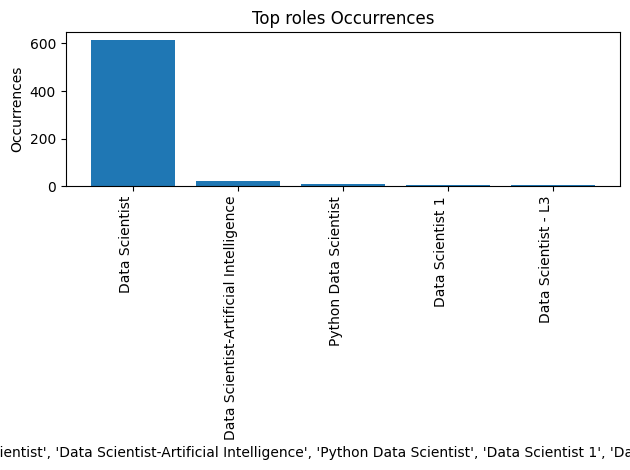

companies
Turing Global India             76
IBM                             23
Diverse Lynx                    13
Leading Client                  12
Wipro                           11
                                ..
Zensar                           1
4D Global                        1
Neal Analytics                   1
Arivonix                         1
Magnify360 Hi-tech Solutions     1
Name: count, Length: 655, dtype: int64
{'Turing Global India': np.int64(76), 'IBM': np.int64(23), 'Diverse Lynx': np.int64(13), 'Leading Client': np.int64(12), 'Wipro': np.int64(11), 'Paypal': np.int64(10), 'Fortune Global 500 IT Services Firm': np.int64(7), 'Acme Services': np.int64(7), 'Hexaware Technologies': np.int64(7), 'Capgemini': np.int64(6), 'Exxon Mobil Corporation': np.int64(6), 'Amazon': np.int64(6), 'Fusion Plus Solutions': np.int64(6), 'Head Infotech India': np.int64(5), 'Emagine': np.int64(5), 'UPS Supply Chain Solutions (UPS SCS)': np.int64(5), 'Ltimindtree': np.int64(5), 'Prescienc

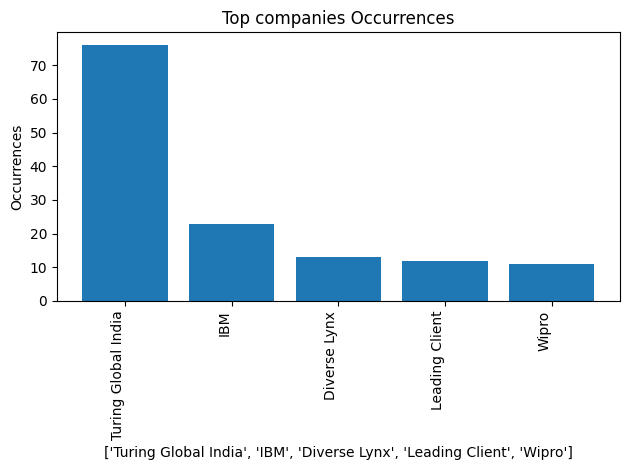

locations
Bengaluru                       238
Remote                          111
Hyderabad                        94
Pune                             67
Mumbai                           63
                               ... 
Mumbai Suburban                   1
Bhopal                            1
Gurugram, Gurgaon/Gurugram        1
Indore, Hyderabad, Ahmedabad      1
Panaji                            1
Name: count, Length: 147, dtype: int64
{'Bengaluru': np.int64(238), 'Remote': np.int64(111), 'Hyderabad': np.int64(94), 'Pune': np.int64(67), 'Mumbai': np.int64(63), 'Chennai': np.int64(55), 'Gurugram': np.int64(38), 'Kolkata, Mumbai, New Delhi, Hyderabad, Pune, Chennai, Bengaluru': np.int64(33), 'Noida': np.int64(31), 'New Delhi': np.int64(23), 'Ahmedabad': np.int64(15), 'Hyderabad, Bengaluru': np.int64(13), 'Kolkata': np.int64(12), 'Hybrid - Bengaluru': np.int64(9), 'Chennai, Bengaluru': np.int64(9), 'Mumbai, Delhi / NCR, Bengaluru': np.int64(6), 'Hybrid - Pune': np.int64(5), 'Mohali':

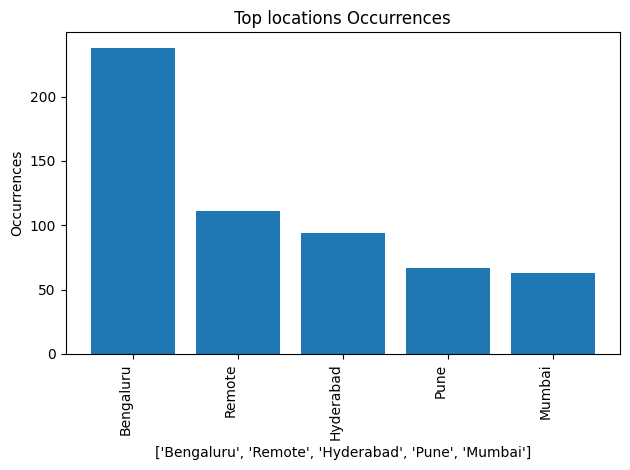

experience
3-7 Yrs      114
3-8 Yrs       77
8-13 Yrs      71
2-7 Yrs       54
5-10 Yrs      51
            ... 
15-20 Yrs      1
0 Yrs          1
0-6 Yrs        1
12-16 Yrs      1
10-16 Yrs      1
Name: count, Length: 71, dtype: int64
{'3-7 Yrs': np.int64(114), '3-8 Yrs': np.int64(77), '8-13 Yrs': np.int64(71), '2-7 Yrs': np.int64(54), '5-10 Yrs': np.int64(51), '3-6 Yrs': np.int64(44), '3-5 Yrs': np.int64(44), '5-8 Yrs': np.int64(43), '2-5 Yrs': np.int64(41), '2-6 Yrs': np.int64(33), '4-8 Yrs': np.int64(31), '4-7 Yrs': np.int64(26), '4-9 Yrs': np.int64(25), '2-4 Yrs': np.int64(22), '1-2 Yrs': np.int64(20), '0-5 Yrs': np.int64(19), '7-12 Yrs': np.int64(19), '5-7 Yrs': np.int64(18), '6-11 Yrs': np.int64(17), '4-6 Yrs': np.int64(16), '1-3 Yrs': np.int64(15), '5-9 Yrs': np.int64(14), '8-12 Yrs': np.int64(11), '1-4 Yrs': np.int64(11), '6-8 Yrs': np.int64(10), '1-6 Yrs': np.int64(10), '2-3 Yrs': np.int64(10), '1-5 Yrs': np.int64(9), '8-10 Yrs': np.int64(9), '7-10 Yrs': np.int64(8), '6-9 Yrs

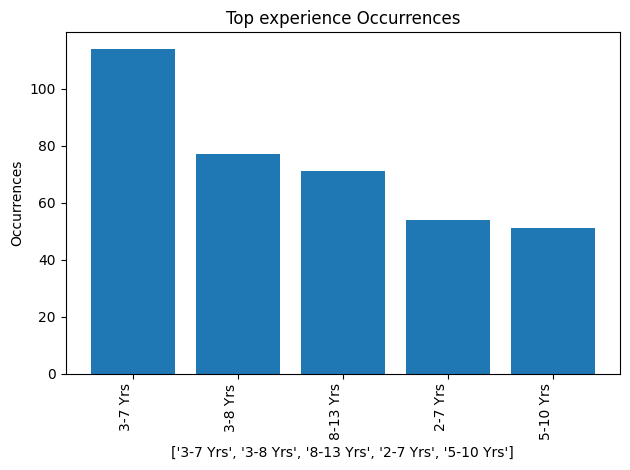

skills
Data Scientist                                                                                                                                   18
algorithms, python, modeling, data analysis, data analytics, natural language processing, predictive, machine learning                           10
Natural Language Processing, Cnn, Artificial Intelligence, Neural Networks, Data Mining, Data Extraction, Text Mining, LLM                        4
Data Science, GCP, Natural Language Processing, Aws Sagemaker, Aiml, Computer Vision, Machine Learning, Deep Learning                             4
Supply chain, Automation, Front end, Agile, Scrum, Data mining, Analytics, SQL                                                                    3
                                                                                                                                                 ..
Automation, data science, Data modeling, Project management, Data collection, Engineering Manager, Regres

/var/folders/bz/l_61zlvj34gcp1c8znmr81rr0000gn/T/ipykernel_44820/486147009.py:26: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


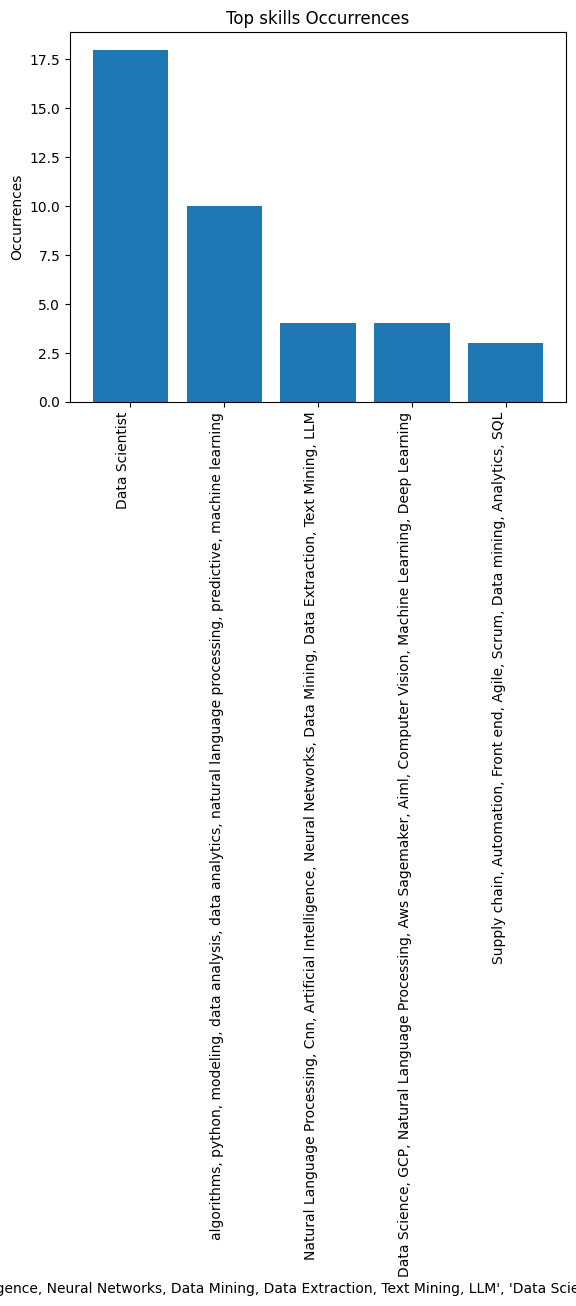

In [10]:
# let's make a bar plot of the highest-frequency values in each column
for col_name in df.columns.tolist():
    # first we need to get value counts
    counts = df[col_name].value_counts()
    print(counts)

    # next we need to save this into a dictionary
    counts_dict = dict(counts)
    print(counts_dict)

    # each key is an x-axis bin label and each count is the bar value
    x = []
    y = []

    for key in list(counts_dict.keys())[0:5]:
        x.append(key)
        y.append(counts_dict[key])

    # create bar plot
    plt.figure()
    plt.bar(x,y)
    plt.title(f"Top {col_name} Occurrences")
    plt.xlabel(x)
    plt.xticks(rotation=90, ha='right')
    plt.ylabel('Occurrences')
    plt.tight_layout()
    plt.show()


    



## Clean up checklist
- make everything lowercase
- split experience into two columns, one for lower-case, one for upper-case
- try to standardize job roles (i.e. 'data scientist = data scientist 1') ? 
- likewise standardize skills list